### Reconhecimento de Imagens ( Dígitos )

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [6]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


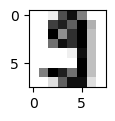

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(1,1))
plt.imshow(digits.images[128], cmap = plt.cm.gray_r)

### Aplicação do SVM

In [16]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [19]:
from sklearn import svm
from sklearn import metrics

classifier = svm.SVC()
classifier.fit(x_train, y_train)
previsoes = classifier.predict(x_test)
acertos = metrics.accuracy_score(y_test, previsoes)
print(acertos)

0.9851851851851852


#### Reconhecimento de um Dígito

In [34]:
import numpy as np
import matplotlib.image as  mpimg

img = mpimg.imread('number.png')

def rgb2gray(rgb):
    img_array = np.dot(rgb[...,:3],[0.299, 0.587, 0.114])
    img_array = (16- (img_array * 16)).astype(int)
    img_array = img_array.flatten()
    return img_array
    
previsao = classifier.predict([rgb2gray(img)])
print(previsao)

[1]


#### Teste com Regressao Logística

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
previsao_logreg = logreg.predict([rgb2gray(img)])
acertos_logreg = metrics.accuracy_score(y_test, previsoes_logreg)
print(acertos_logreg)

0.9629629629629629


C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(previsao_logreg)

[1]
